In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importamos los registros limpios y los exhibimos

In [2]:
df = pd.read_csv('Monitores Nuevos - Registros limpios - Mercado Libre Argentina - Agosto 2023.csv', index_col= 0)

# Números exhibidos como flotantes con un decimal después de la coma
pd.set_option('display.float_format', '{:.1f}'.format)

df.head()

,Marca,Modelo,Tamaño de la pantalla,Tipo de resolución,Tipo de pantalla,Frecuencia de actualización,Precio,Link
0,Philips,271E1SCA/55,27.0,FHD,LCD,75,185999,https://www.mercadolibre.com.ar/monitor-gamer-...
1,Samsung,F24T35,24.0,FHD,LED,75,86999,https://www.mercadolibre.com.ar/monitor-gamer-...
2,Samsung,F22T35,22.0,FHD,LED,75,75999,https://www.mercadolibre.com.ar/monitor-gamer-...
3,Noblex,MK24X7100,23.8,FHD,LED,75,66990,https://www.mercadolibre.com.ar/monitor-led-no...
4,Philips,221V8,21.5,FHD,LCD,75,51499,https://www.mercadolibre.com.ar/monitor-gamer-...


## Cantidad de registros: 1240

In [3]:
print(len(df))

1240


## Las cinco marcas con mayor presencia:

1. LG: 324 publicaciones
2. Samsung: 297 publicaciones
3. Philips: 138 publicaciones
4. ViewSonic: 73 publicaciones
5. Asus: 70 publicaciones

In [4]:
df['Marca'].value_counts()[range(5)]

LG           324
Samsung      297
Philips      138
ViewSonic     73
Asus          70
Name: Marca, dtype: int64

## ¿Cuál de esas cinco marcas es la más barata en promedio?

<p>De las cinco marcas con mayor presencia, Philips es la más barata en promedio con ARS 88.530,90</p>

In [5]:
cincoMarcasConMayorPresencia = ['LG','Samsung','Philips','ViewSonic','Asus']
df[df['Marca'].isin(cincoMarcasConMayorPresencia)][['Marca','Precio']].groupby('Marca').mean().sort_values(by='Precio')

,Precio
Marca,
Philips,88530.9
Samsung,180144.0
ViewSonic,181476.7
Asus,225040.8
LG,258425.9


## Rango de tamaños para monitores:

<p>Tamaño más pequeño disponible: 15.6 "</p>
<p>Tamaño más grande disponible: 49 "</p>
<p>Cantidad de tamaños únicos: 29</p>

In [6]:
print(df['Tamaño de la pantalla'].min(),",",df['Tamaño de la pantalla'].max())
print(len(df['Tamaño de la pantalla'].unique()))

15.6 , 49.0
29


## Rango de precios para monitores:

<p>Precio más barato disponible: ARS 37.000</p>
<p>Precio más caro disponible: ARS 5.999.999</p>
<p>Cantidad de precios únicos: 1068</p>

In [7]:
print(df['Precio'].min(),",",df['Precio'].max())
print(len(df['Precio'].unique()))

37000 , 5999999
1068


## Monitor o monitores con la mayor frecuencia de actualización:

<p>La mayor frecuencia de actualización disponible es 360 Hz y es compartido entre tres publicaciones; dos son el mismo monitor ViewSonic con distinto precio y el otro es marca ASUS. En resumen, sólo dos monitores tienen la mayor frecuencia.</p>

In [8]:
df[(df['Frecuencia de actualización']==df['Frecuencia de actualización'].max())]

,Marca,Modelo,Tamaño de la pantalla,Tipo de resolución,Tipo de pantalla,Frecuencia de actualización,Precio,Link
94,Asus,PG259QNR,24.5,FHD,LED,360,479000,https://www.mercadolibre.com.ar/monitor-gamer-...
534,ViewSonic,XG251G,24.5,FHD,LED,360,461219,https://articulo.mercadolibre.com.ar/MLA-12043...
844,ViewSonic,XG251G,24.5,FHD,LED,360,622639,https://articulo.mercadolibre.com.ar/MLA-12036...


## Resolución de pantalla más común: FHD (Full High Definition)

<p>Una alta resolución de pantalla, tanto para trabajar como para jugar videojuegos, se ha vuelto una exigencia. Y esto se ve reflejado en la cantidad de monitores Full HD.</p>

<AxesSubplot:>

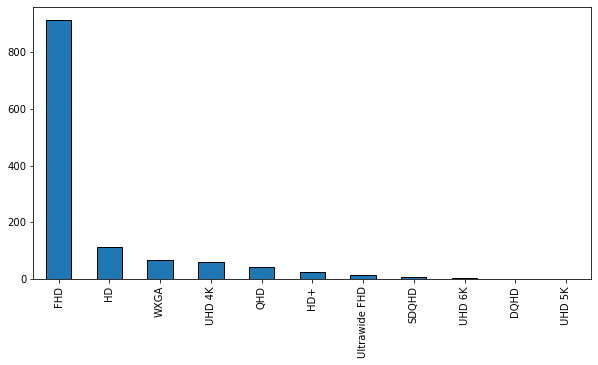

In [9]:
df['Tipo de resolución'].value_counts().plot.bar(figsize=(10,5),edgecolor='black')

## Tipo de pantalla más común: LED

<p>Como se esperaba, LED es el tipo de pantalla más común debido a que se buscó específicamente monitores con esa tecnología.</p>

<AxesSubplot:>

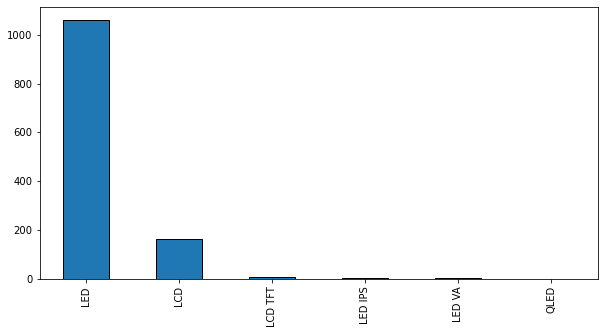

In [10]:
df['Tipo de pantalla'].value_counts().plot.bar(figsize=(10,5),edgecolor='black')

## Frecuencia más común: 60 Hz

<p>La frecuencia de 75 Hz tambíen es muy común.</p>

<p>Las frecuencias de 144 Hz en adelante son para el nicho de usuarios "gamer" y, por tanto, no hay tantos monitores a la venta como sucede con los de 60 Hz.</p>

<AxesSubplot:>

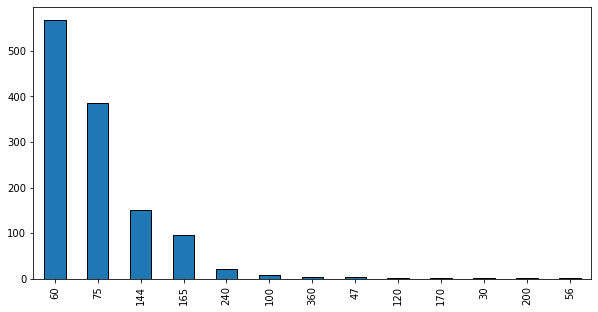

In [11]:
df['Frecuencia de actualización'].value_counts().plot.bar(figsize=(10,5),edgecolor='black')

## Variedad de características según marca

### Definimos una función que buscará la marca con mayor variedad según el campo que le pasemos

In [12]:
# De cada marca, busca cuántos datos únicos tiene el campo que le pasemos por parámetro.
# La marca con la mayor cantidad es la que se almacena. Si hay otra que la supere, se sobreescribe.
def marcaConMayorVariedad(campo):
    marca = ''
    cantidad = 0    
    for x in df['Marca'].unique():    
        if len(df[(df['Marca'] == x)][campo].unique()) > cantidad:
            cantidad = len(df[(df['Marca'] == x)][campo].unique())
            marca = x
    return list((marca,cantidad))
    

### Marca con mayor variedad de tamaños:

<p>La marca con mayor variedad de tamaños es LG con 20 variedades diferentes.</p>

In [13]:
marcaConMayorVariedad('Tamaño de la pantalla')

['LG', 20]

### Marca con mayor variedad de resoluciones de pantalla:

<p>La marca con mayor variedad de resoluciones es LG con 7 variedades diferentes.</p>

In [14]:
marcaConMayorVariedad('Tipo de resolución')

['LG', 7]

### Marca con mayor variedad de tipos de pantalla:

<p>La marca con mayor variedad de tipos de pantalla es Samsung con 5 variedades diferentes.</p>

In [15]:
marcaConMayorVariedad('Tipo de pantalla')

['Samsung', 5]

### Marca con mayor variedad de frecuencias de actualización:

<p>La marca con mayor variedad de frecuencias de actualización es LG con 7 variedades diferentes.</p>

In [16]:
marcaConMayorVariedad('Frecuencia de actualización')

['LG', 7]

## Histograma de precios

<p>Cada barra del histograma representa ARS 50.000</p>
<p>La mayoría de los monitores rondan entre ARS 37.000 y ARS 200.000</p>

<AxesSubplot:ylabel='Frequency'>

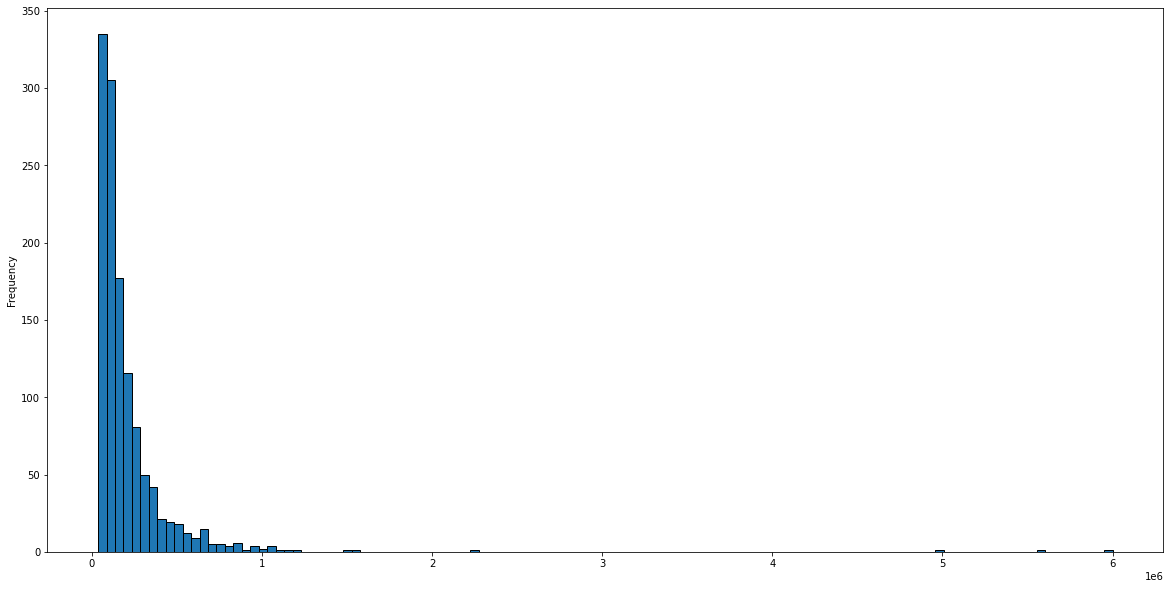

In [17]:
df['Precio'].plot.hist(figsize=(20,10),bins = 120, edgecolor='black')

## Relación entre precio y tamaño de pantalla

<AxesSubplot:xlabel='Tamaño de la pantalla', ylabel='Precio'>

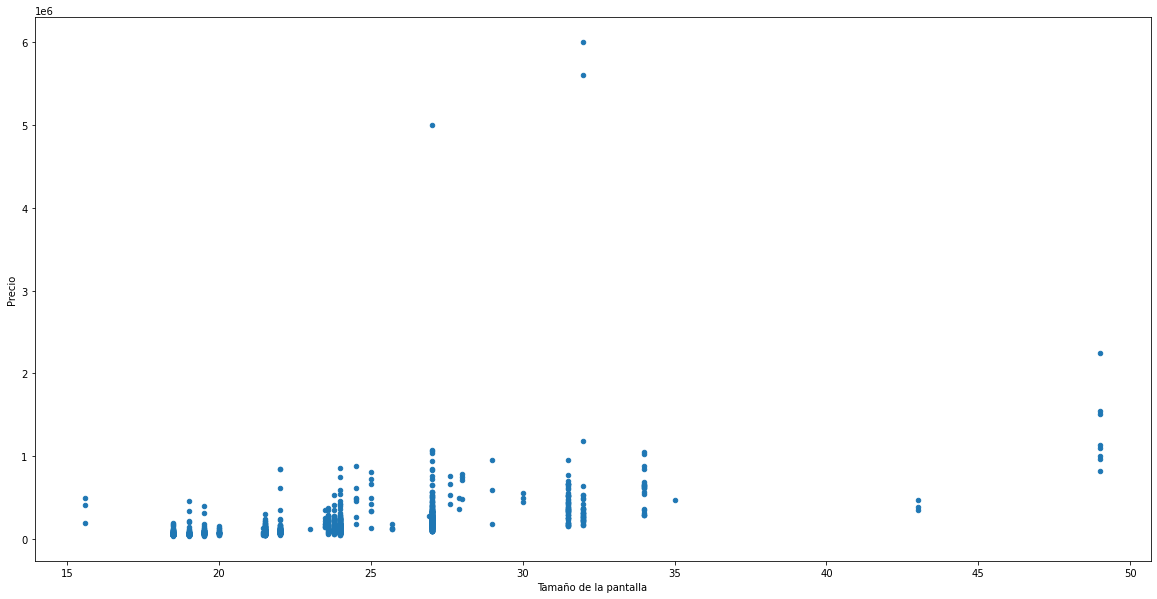

In [18]:
df[['Tamaño de la pantalla','Precio']].plot.scatter(x=0,y=1,figsize=(20,10))

## Relación entre precio y frecuencia de actualización

<AxesSubplot:xlabel='Frecuencia de actualización', ylabel='Precio'>

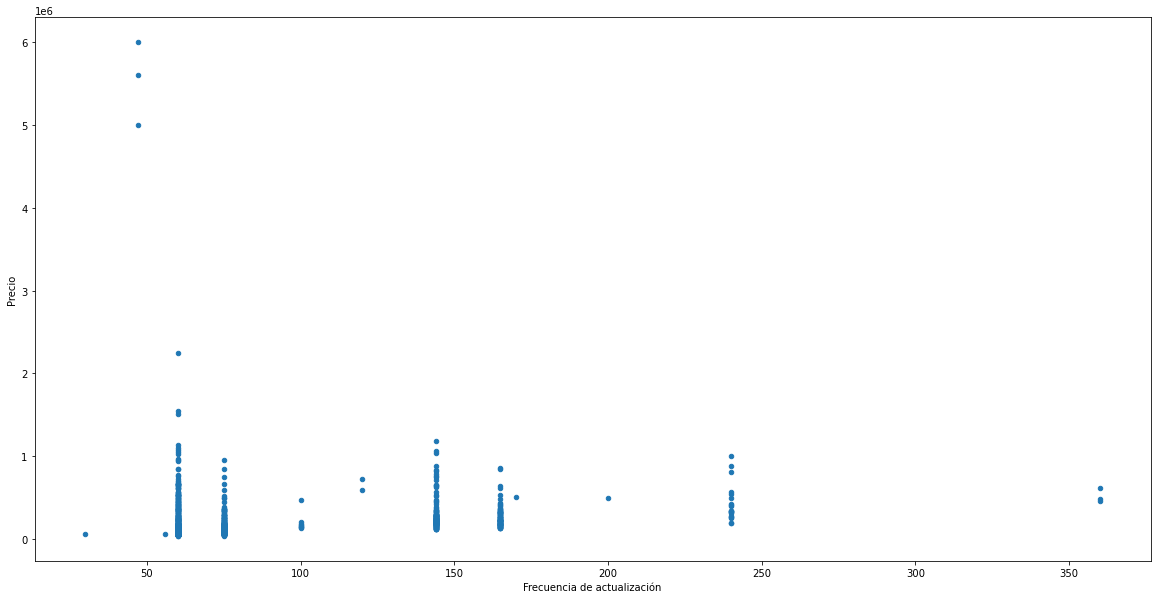

In [19]:
df[['Frecuencia de actualización','Precio']].plot.scatter(x=0,y=1,figsize=(20,10))

## Los tres monitores más baratos:

In [20]:
df.sort_values(by='Precio').head(3)

,Marca,Modelo,Tamaño de la pantalla,Tipo de resolución,Tipo de pantalla,Frecuencia de actualización,Precio,Link
1432,iQual,Home19,19.0,HD,LED,75,37000,https://articulo.mercadolibre.com.ar/MLA-14288...
1754,Gfast,T-195,19.5,HD,LED,60,39999,https://articulo.mercadolibre.com.ar/MLA-14652...
1463,Samsung,185,18.5,HD,LCD,60,43000,https://articulo.mercadolibre.com.ar/MLA-14287...


## Los tres monitores más caros:

<p>Todos coinciden con la marca Apple. Tienen resoluciones UHD (Ultra High Definition) entre 5K y 6K. Y sus precios van entre ARS 5.000.000 y ARS 6.000.000</p>

In [21]:
df.sort_values(by='Precio', ascending = False).head(3)

,Marca,Modelo,Tamaño de la pantalla,Tipo de resolución,Tipo de pantalla,Frecuencia de actualización,Precio,Link
1611,Apple,XDR NANO,32.0,UHD 6K,LED,47,5999999,https://articulo.mercadolibre.com.ar/MLA-11874...
1672,Apple,XDR STANDARD,32.0,UHD 6K,LED,47,5599999,https://articulo.mercadolibre.com.ar/MLA-11874...
1673,Apple,XDR NANO,27.0,UHD 5K,LED,47,4999999,https://articulo.mercadolibre.com.ar/MLA-11000...


## La marca más cara en promedio:

<p>Apple, con un precio promedio de ARS 5.533.332,3</p>

In [22]:
df[['Marca','Precio']].groupby('Marca').mean().sort_values(by='Precio', ascending=False).iloc[0]

Precio   5533332.3
Name: Apple, dtype: float64